In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Healthcare_Providers.csv')
print(df)


         index  National Provider Identifier  \
0      8774979                    1891106191   
1      3354385                    1346202256   
2      3001884                    1306820956   
3      7594822                    1770523540   
4       746159                    1073627758   
...        ...                           ...   
99995  3837311                    1386938868   
99996  2079360                    1215091327   
99997  8927965                    1902868185   
99998  8854571                    1891941183   
99999  3547535                    1356772156   

      Last Name/Organization Name of the Provider First Name of the Provider  \
0                                     UPADHYAYULA                  SATYASREE   
1                                           JONES                      WENDY   
2                                        DUROCHER                    RICHARD   
3                                         FULLARD                     JASPER   
4                      

# 1. Provider Demographics and Behavior


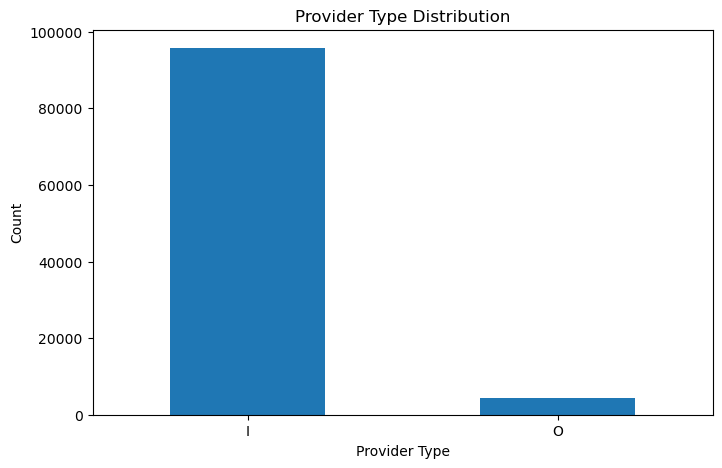

In [3]:
#Provider Type Distribution
provider_type_counts = df['Entity Type of the Provider'].value_counts()

# Bar chart for provider type
provider_type_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Provider Type Distribution")
plt.xlabel("Provider Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

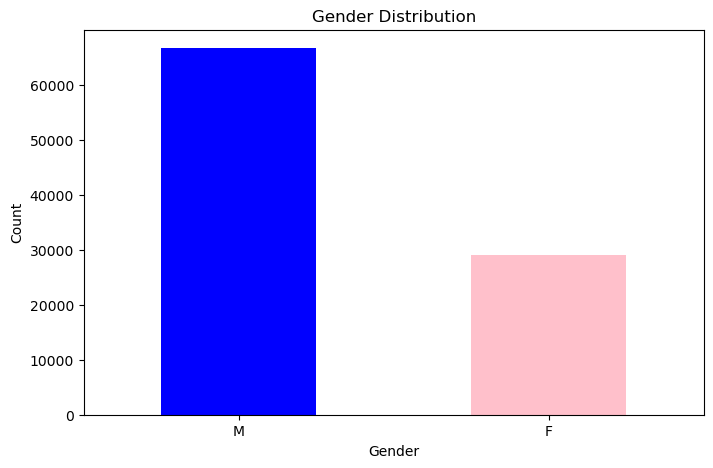

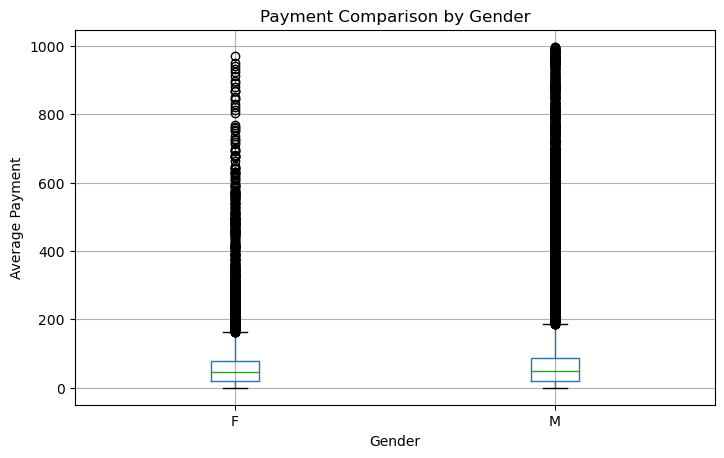

In [4]:
# Gender distribution
gender_counts = df['Gender of the Provider'].value_counts()

# Bar chart for gender
gender_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 5))
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Ensure payment column is numeric
df['Average Medicare Payment Amount'] = pd.to_numeric(df['Average Medicare Payment Amount'], errors='coerce')

# Remove invalid data
df = df.dropna(subset=['Average Medicare Payment Amount'])

# Compare financial metrics by gender
gender_financials = df.groupby('Gender of the Provider')['Average Medicare Payment Amount'].mean()

# Boxplot for gender-based payments
df.boxplot(column='Average Medicare Payment Amount', by='Gender of the Provider', figsize=(8, 5))
plt.title("Payment Comparison by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Average Payment")
plt.show()


# 2. Geographic Insights

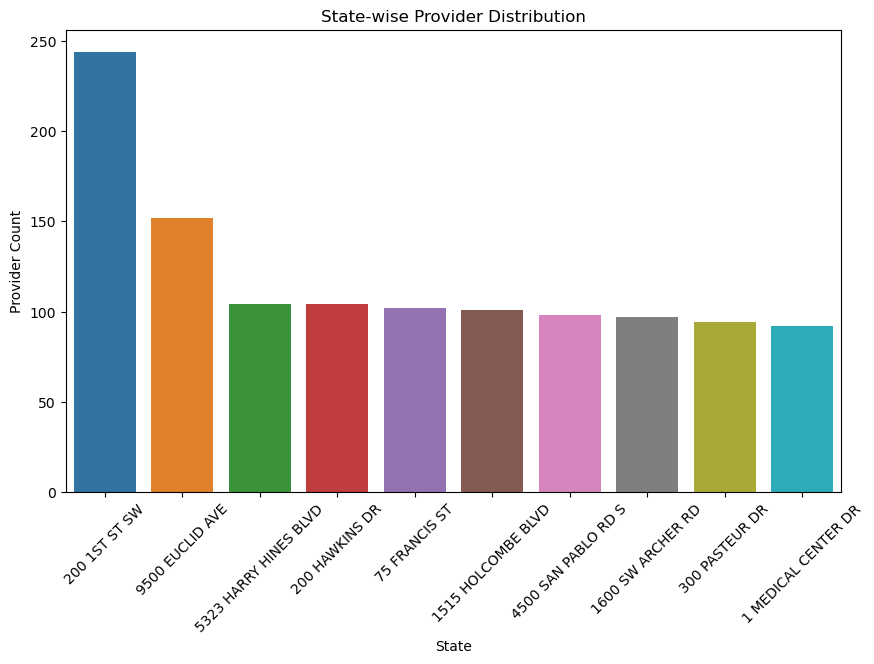

In [5]:
# State-wise provider count
state_counts = df['Street Address 1 of the Provider'].value_counts()

# Heatmap preparation (dummy for simplicity)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10])  # Top 10 states
plt.xticks(rotation=45)
plt.title("State-wise Provider Distribution")
plt.xlabel("State")
plt.ylabel("Provider Count")
plt.show()


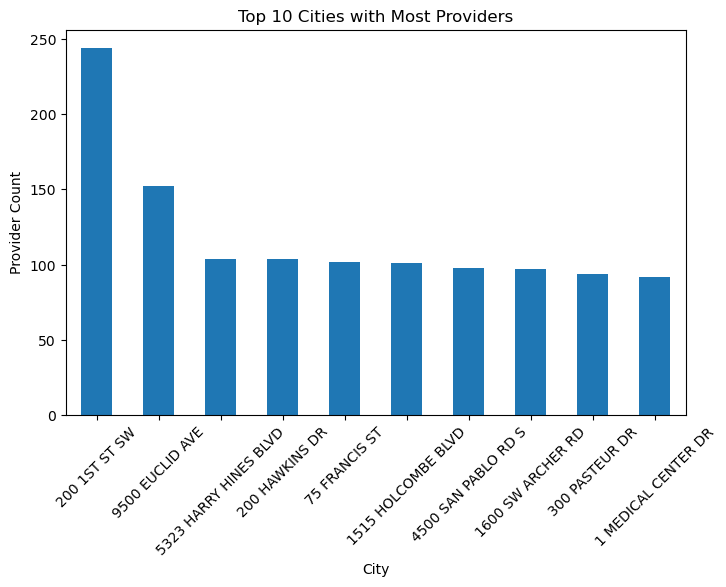

In [6]:
# City-wise provider count
city_counts = df['Street Address 1 of the Provider'].value_counts()

# Bar chart for top cities
city_counts.head(10).plot(kind='bar', figsize=(8, 5))
plt.title("Top 10 Cities with Most Providers")
plt.xlabel("City")
plt.ylabel("Provider Count")
plt.xticks(rotation=45)
plt.show()


# 3. Financial Performance

In [7]:
print(df.columns)


Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


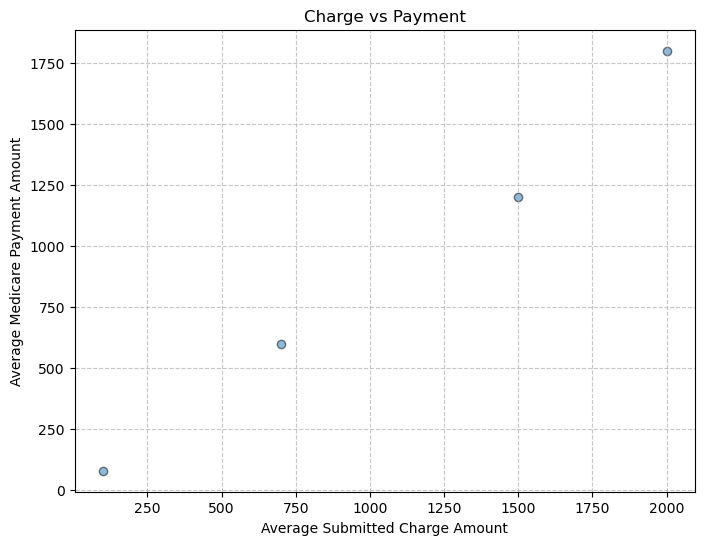

In [21]:
#as our dataset was large 

# Assuming `df` is your DataFrame
# Example DataFrame structure
# Replace this with your actual data loading code
df = pd.DataFrame({
    'Average Submitted Charge Amount': [100, 2000, 1500, 700, 3000000],
    'Average Medicare Payment Amount': [80, 1800, 1200, 600, 2500000]
})

# Step 1: Check for null values
if df[['Average Submitted Charge Amount', 'Average Medicare Payment Amount']].isnull().any().any():
    print("Dataset contains null values. Cleaning up...")
    df = df.dropna(subset=['Average Submitted Charge Amount', 'Average Medicare Payment Amount'])

# Step 2: Handle outliers
q1_charge = df['Average Submitted Charge Amount'].quantile(0.25)
q3_charge = df['Average Submitted Charge Amount'].quantile(0.75)
iqr_charge = q3_charge - q1_charge

q1_payment = df['Average Medicare Payment Amount'].quantile(0.25)
q3_payment = df['Average Medicare Payment Amount'].quantile(0.75)
iqr_payment = q3_payment - q1_payment

filtered_df = df[
    (df['Average Submitted Charge Amount'] >= (q1_charge - 1.5 * iqr_charge)) &
    (df['Average Submitted Charge Amount'] <= (q3_charge + 1.5 * iqr_charge)) &
    (df['Average Medicare Payment Amount'] >= (q1_payment - 1.5 * iqr_payment)) &
    (df['Average Medicare Payment Amount'] <= (q3_payment + 1.5 * iqr_payment))
]

# Step 3: Downsample the data (optional, for very large datasets)
sampled_df = filtered_df.sample(n=min(1000, len(filtered_df)), random_state=42)

# Step 4: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    sampled_df['Average Submitted Charge Amount'], 
    sampled_df['Average Medicare Payment Amount'], 
    alpha=0.5, edgecolor='k'
)
plt.title("Charge vs Payment")
plt.xlabel("Average Submitted Charge Amount")
plt.ylabel("Average Medicare Payment Amount")
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Save the plot to a file
plt.savefig("scatter_plot_optimized.png", dpi=300)

# Show the plot
plt.show()


Average Submitted Charge Amount    0
Average Medicare Payment Amount    0
dtype: int64


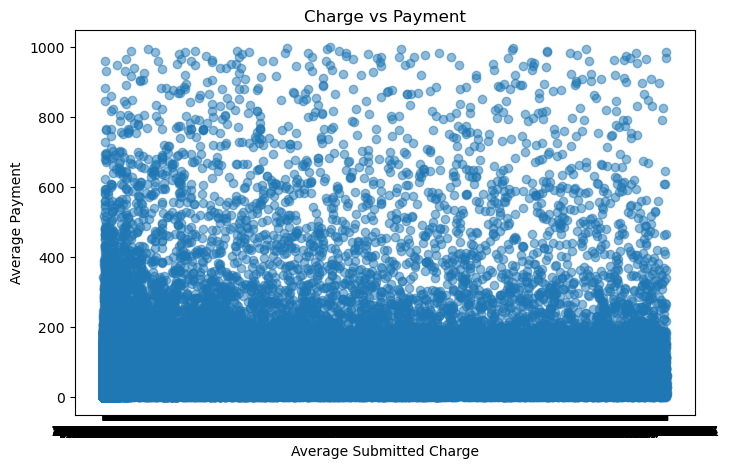

In [8]:
#Charge vs Payment Discrepancies
# Scatter plot for charges vs payments
print(df[['Average Submitted Charge Amount', 'Average Medicare Payment Amount']].isnull().sum())
plt.figure(figsize=(8, 5))
plt.scatter(
    df['Average Submitted Charge Amount'], 
    df['Average Medicare Payment Amount'], 
    alpha=0.5
)
plt.title("Charge vs Payment")
plt.xlabel("Average Submitted Charge")
plt.ylabel("Average Payment")
plt.show()

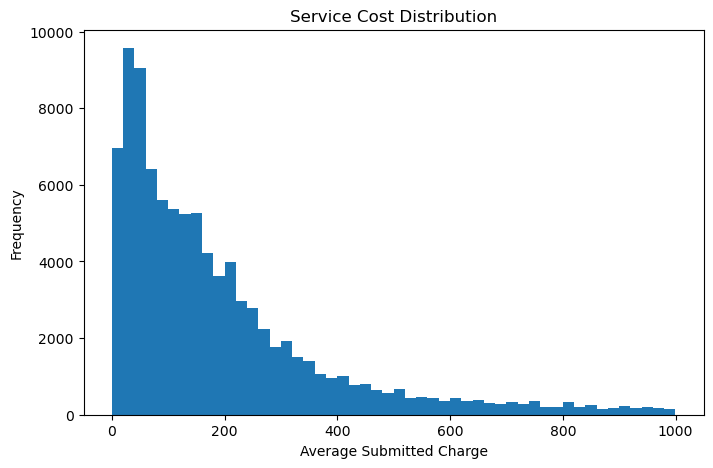

In [9]:
#Service Cost Distribution
# Histogram for service cost distribution
df['Average Submitted Charge Amount'] = pd.to_numeric(df['Average Submitted Charge Amount'], errors='coerce')
df = df.dropna(subset=['Average Submitted Charge Amount'])
df['Average Submitted Charge Amount'] = df['Average Submitted Charge Amount'].astype(float)
df['Average Submitted Charge Amount'].plot(kind='hist', bins=50, figsize=(8, 5))
plt.title("Service Cost Distribution")
plt.xlabel("Average Submitted Charge")
plt.show()


# 4. Anomaly Detection

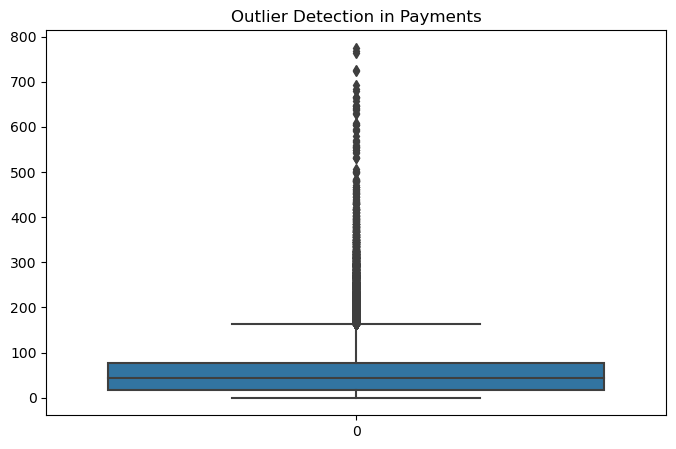

In [10]:
#Outlier Providers
# Boxplot for outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(df['Average Medicare Payment Amount'])
plt.title("Outlier Detection in Payments")
plt.show()


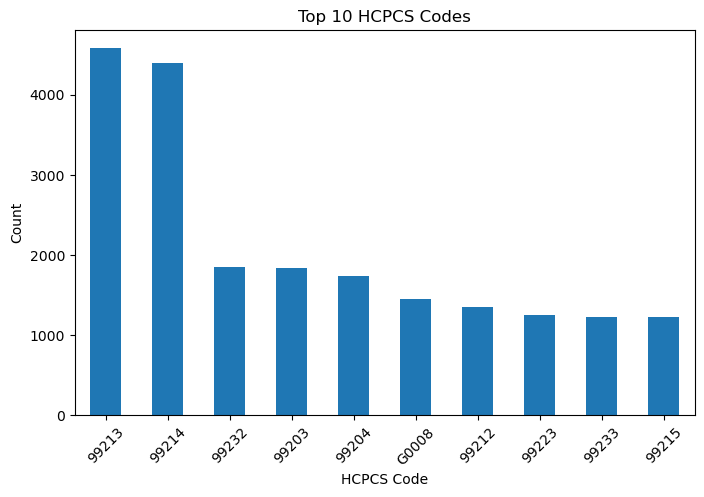

In [11]:
#HCPCS Code Analysis
# Top HCPCS codes by count
hcpcs_counts = df['HCPCS Code'].value_counts().head(10)

# Pareto chart
hcpcs_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Top 10 HCPCS Codes")
plt.xlabel("HCPCS Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# 5. Service Metrics

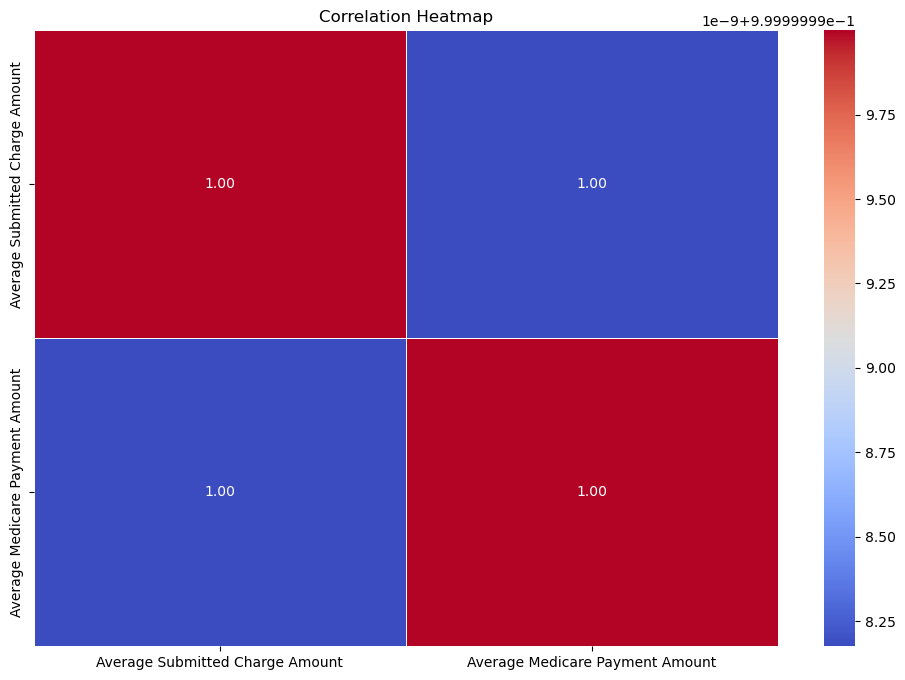

In [22]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Missing values in 'Number of Services': 2613


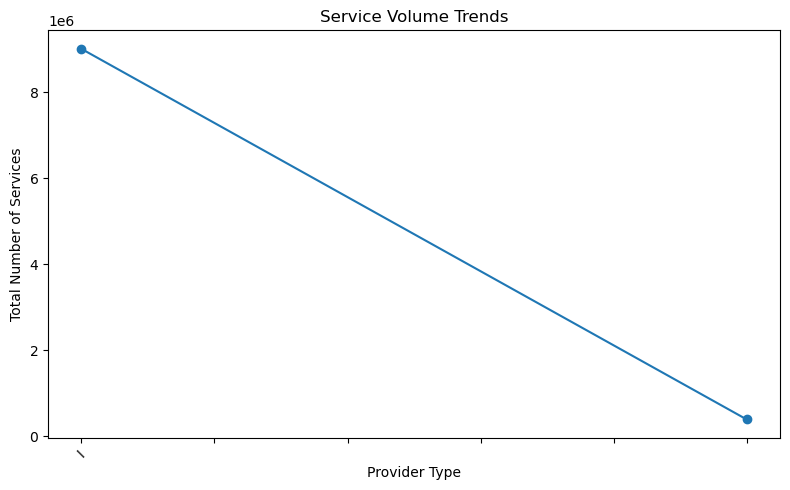

In [13]:
#Service Volume Trends
# Service counts by provider type
# Convert 'Number of Services' to numeric, forcing errors to NaN for non-numeric entries
df['Number of Services'] = pd.to_numeric(df['Number of Services'], errors='coerce')

# Check for any missing or NaN values in 'Number of Services'
missing_values = df['Number of Services'].isnull().sum()
print(f"Missing values in 'Number of Services': {missing_values}")

# Optionally, drop rows with missing 'Number of Services' or fill them with 0
df = df.dropna(subset=['Number of Services'])

# Now proceed with grouping and plotting
service_volume = df.groupby('Entity Type of the Provider')['Number of Services'].sum()

# Line plot for trends
service_volume.plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Service Volume Trends")
plt.xlabel("Provider Type")
plt.ylabel("Total Number of Services")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



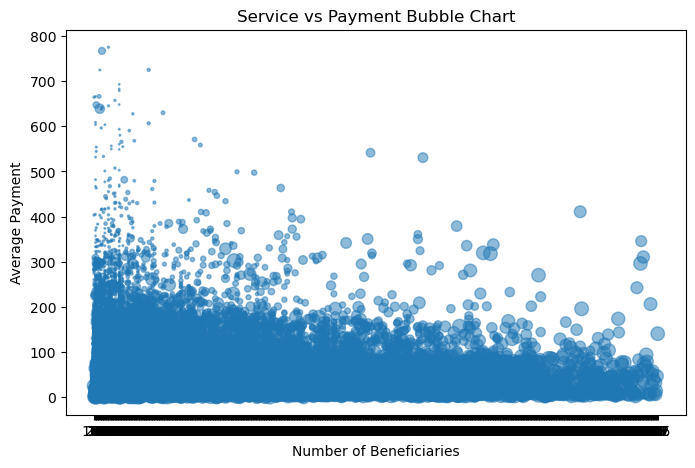

In [14]:
#Beneficiary Analysis
# Bubble chart for services vs payments
plt.figure(figsize=(8, 5))
plt.scatter(df['Number of Medicare Beneficiaries'], df['Average Medicare Payment Amount'],
            s=df['Number of Services'] / 10, alpha=0.5)
plt.title("Service vs Payment Bubble Chart")
plt.xlabel("Number of Beneficiaries")
plt.ylabel("Average Payment")
plt.show()


# 6. Data Quality and Patterns

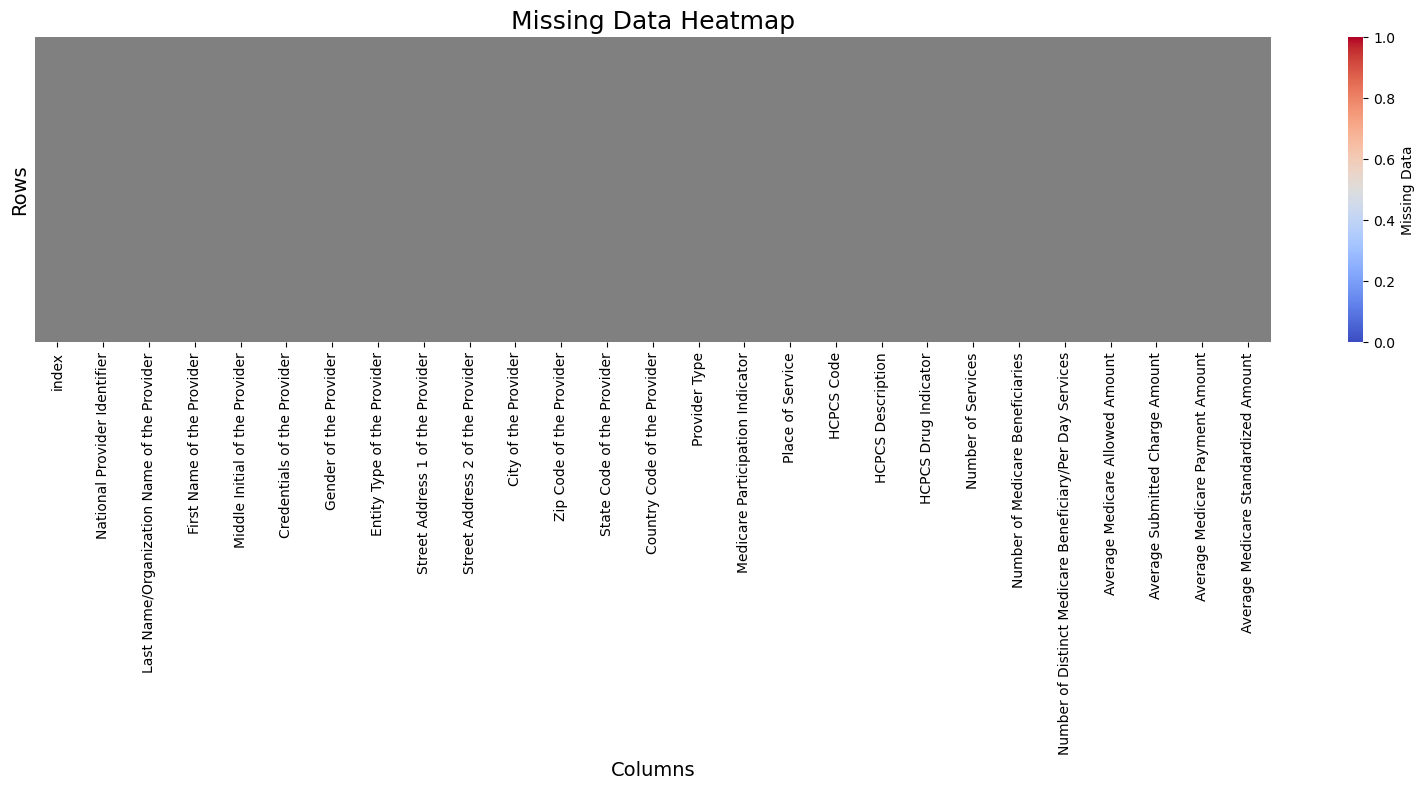

In [18]:
#Missing Data Patterns
plt.figure(figsize=(16, 8))

# Plot the heatmap for missing values with a more readable color palette and better label formatting
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', 
            xticklabels=df.columns, yticklabels=False, cbar_kws={'label': 'Missing Data'})

# Improve readability of labels
plt.title("Missing Data Heatmap", fontsize=18)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Rows", fontsize=14)

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.tight_layout()

plt.show()

In [16]:
#Duplication and Consistency Checks
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Address consistency check
consistent_addresses = df['Street Address 1 of the Provider'].nunique()
print(f"Unique addresses: {consistent_addresses}")


Number of duplicate rows: 0
Unique addresses: 48626
